<h1> Project Description </h1>

Done with equal contributions by:   
    <code> Yong Shun Jie U2221938C </code>   
    <code> Lim Yan Xuan U2223441H </code>   
    <code> Terri Tan Yue Min U2221019C </code>   

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart. In this project, you will need to develop a Reinforcement Learning (RL) agent. The trained agent makes the decision to push the cart to the left or right based on the cart position, velocity, and the pole angle, angular velocity.   
  
After some research, we decided on two different algorithms for this problem, the <span style="color:blue; font-weight:bold"> Deep Q-learning Neural Network </span> and the <span style="color:blue; font-weight:bold"> Proximial Policy Optimization </span>

We present our findings here.

## Solution

After some research, we came to the conclusion of 2 different algorithms for this problem, a <span style="color:blue; font-weight:bold"> Deep Q-Learning Neural Network </span> and <span style="color:blue; font-weight:bold"> Proximial Oplicy Optimization </span>

These are the differences between the two reinforcement learning algorithm:

<b>Deep Q-learning Neural Network </b> :   
The Deep Q-learning Neural Netork is value based reinforcement learning algorithm that is similar to the Q-learning algorithm. However, instead of using a formula to greedily find the Q-function of the environment, DQN tries to approximate the Q-function using neural networks.

DQN utilizes <b style="color:blue;">Experience Replaying</b> and <b style="color:blue;"> Fixed Q Targets </b> to stabilize its training along with the Q-learning update formula to approximate the Q-function.   

The Q-learning update rule :

<br/>
$$ L_i(\theta_i) = \mathbb{E}_{s,a,s',r \sim D} \left[ \left( r + \gamma \max_{a'} Q(s', a'; \theta_i^-) - Q(s, a; \theta_i) \right)^2 \right]
 $$
 


<b> Proximial Policy Optimization </b> :    
Proximial Policy Optimization is a policy based reinforcement learning algorithm. PPO is a successor to the famous <b style="color:blue">Trust Region Policy Optimization (TRPO) </b>, made by OpenAI to overcome its limitations.

PPO tries to optimize the policy function without explicitly estimating the v value function. PPO is designed to not only be more <b style="color:blue;">sample-efficient </b>, it is also more <b style="color:blue;">stable during training</b>.

PPO tries to optimize the policy using this function:     
<br/>
$$ L_t^{CLIP+VF+S}(\theta) = \hat{\mathbb{E}}_t \left[ L_t^{CLIP}(\theta) - c_1 L_t^{VF}(\theta) + c_2 S[\pi_\theta](s_t) \right]
 $$

Choice of Reinforcement Learning Algorithm: <b>PPO</b>

- In terms of Continuous Action Space, PPO is more suited for continuous action spaces, like controlling the movement of the cart on a horizontal axis. It <b style="color:blue;">eases the task where actions are continuous</b>.
- It is <b style="color:blue;">more sample-efficient</b>. As exploration and learning from limited spaces are crucial in the pole cart balancing task, the efficiency from PPO can lead to faster convergence and better performance.
- Since tasks like pole cart balancing requires precise and consistent control to maintain balance, PPO is designed to be <b style="color:blue">more stable during training</b>.
- PPO's adaptive step sizes and clipped surrogate objective makes it <b style="color:blue">more adaptable to different environments</b>. The flexibility benefits the fine-tuning of the balancing behaviour of the cart in response to the changes in environment and task requirements.

- While both Deep Q-Learning and PPO have its strengths and weakness, PPO's suitability for continuous action spaces, sample efficiency, adaptability and stability makes it a better choice for the pole cart balancing task when making a decision in terms of the Reinforcement Learning Algorithm used.

<h1> Installing dependencies </h1>

In [1]:
!pip install gymnasium
!pip install stable-baselines3[extra]
!pip install moviepy

<h1> Creating the gym environment </h1>

In [2]:
import gymnasium as gym
from stable_baselines3 import PPO

We use ```gym.make()``` to create a simulation of the environment.   
The environment has <span style="color: blue; font-weight: bold;">4 actions</span> that we can take and <span style="color: blue;font-weight: bold;">2 distinct observations</span> for our agent.   

Observation Space contains ```[base position, base velocity, pole angle, pole angular velocity]```.    
Action Space contains ```[left, right]```.

In [3]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
print("Observation Space : {}".format(env.observation_space.shape[0]))
print("Action Space : {}".format(env.action_space.n))

Observation Space : 4
Action Space : 2


To test our envrionment, we will iterate through <b style="color:blue;">10 episodes</b>.   
Taking random actions i.e <code> [left, right] </code> we render the environment until the episode length reaches <code> 500 </code> or the pole angular velocity goes beyond the bounds of ``` ~ -0.418 rad (-24°) and ~ 0.418 rad (24°) ```.



In [4]:
episodes = 10

terminated = False
truncated = False
env.reset()

for episode in range (1, episodes + 1):
    observation = env.reset()
    score = 0
    
    while True:
        env.render()
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        score += reward;
        if terminated or truncated:
            break;
     
    print("Episode {} score : {}".format(episode, score))
env.close()

Episode 1 score : 38.0
Episode 2 score : 21.0
Episode 3 score : 17.0
Episode 4 score : 29.0
Episode 5 score : 15.0
Episode 6 score : 17.0
Episode 7 score : 11.0
Episode 8 score : 11.0
Episode 9 score : 25.0
Episode 10 score : 15.0


<h1> Building and Training the model </h1>
<p>From the Stable Baselines library, we will be using the PPO (<b style="color:blue;">Proximal Policy Optimization</b>) algorithm. MlpPolicy which refers to <b style="color:blue;"> Multi-Layer Perceptron Policy </b> is used as it is a neural network policy that contains multiple layers that is suitable for discrete action spaces and is able to handle a wide range of environments.</p>

In [5]:
import os
import numpy as np
from stable_baselines3 import PPO

In [6]:
model = PPO("MlpPolicy", env, verbose = 1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


To train the model, we will conduct training over 30,000 steps. From the output, we will examine <b style="color:blue;">ep_len_mean</b>,<b style="color:blue">ep_rew_mean</b> and <b style="color:blue">explained_variance</b>. A higher value for <b style="color:blue">ep_len_mean</b> indicates a more successful average duration of episodes. Similarly, a higher <b style="color:blue">ep_rew_mean</b> signifies a better average reward for each episode. For <b style="color:blue">explained_variance</b>, we aim for a higher value closer to 1, as it indicates more accurate predictions. We chose 30,000 steps because it yields the best learning value output after multiple training sessions, allowing the agent to interact more effectively with the environment.

In [7]:
# Train the model
model.learn(total_timesteps=30000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21       |
|    ep_rew_mean     | 21       |
| time/              |          |
|    fps             | 765      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.9        |
|    ep_rew_mean          | 25.9        |
| time/                   |             |
|    fps                  | 610         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009482385 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.000349    |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 153         |
|    ep_rew_mean          | 153         |
| time/                   |             |
|    fps                  | 404         |
|    iterations           | 11          |
|    time_elapsed         | 55          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.004609663 |
|    clip_fraction        | 0.027       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.606       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.65        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00568    |
|    value_loss           | 51.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 169 

In [8]:
PPO_Path = os.path.join("Saved Models", "PPO")
model.save(PPO_Path)

In [9]:
episodes = 10
vec_env = model.get_env()

for episode in range(1, episodes+1):
    obs = vec_env.reset()
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = vec_env.step(action)
        vec_env.render("human")
        if done:
            print("Info: ", info)
            break;

#Hack to close window
import cv2
cv2.destroyAllWindows()

Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 94.359288}, 'TimeLimit.truncated': True, 'terminal_observation': array([1.6738397 , 0.39191687, 0.06172308, 0.1035663 ], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 101.400101}, 'TimeLimit.truncated': True, 'terminal_observation': array([ 0.97589314, -0.0017457 , -0.08285806, -0.165225  ], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 108.763831}, 'TimeLimit.truncated': True, 'terminal_observation': array([ 1.8754412 , -0.0231225 , -0.03925315,  0.19552033], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 116.631899}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.35236737, -0.7644975 ,  0.00732819,  0.29664505], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 124.103099}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.02123193,  0.36682066,  0.07981043, -0.45924643], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 13

<h1> Task 1 : Develop an RL agent </h1>
<b> For this task, we have to demonstrate the correctness of the implementation through sampling a random state from the environment together with an agent input and output a chosen action on whether it is 0(left) or 1(right). </b>
<br/>

In [10]:
import os
import gymnasium as gym
from stable_baselines3 import PPO

env = gym.make("CartPole-v1", render_mode="rgb_array")
model = PPO.load("Saved Models\PPO", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


<p> A new gym environment is created and rendered with rgb_array to visualize the environment. We will use our pre-trained PPO model. A vectorized environment is obtained from the model, enabling the execution of multiple environments simultanteously, each operating independently. This approach significantly accelerates the training process.<br/><br/>
After acquiring the environment, we reset the vectorized environment to a random observation state. Using this observation, the PPO model predicts the first action based on the loaded model. The output displays the observation and the predicted action. In this case, applying a force to the left (0) is intended to balance the pole, as determined by the observation.</p>

In [11]:
vec_env = model.get_env()
obs = vec_env.reset()
action = model.predict(obs)[0]

print("Observation : {}".format(obs))
print("Action : {}".format(action))

Observation : [[-0.04349744 -0.01592666  0.03937313 -0.03470089]]
Action : [1]


<h1> Task 2 : Demonstrate the effectiveness of the RL agent </h1>
<br/>
<b>For this task, we have to run for 100 episodes, resetting each environment at the beginning and plot the cummulative reward against all episodes. Print the average reward over the 100 episodes.</b>
<br/><br/>
Using the vectorized environment, we will iterate through 100 episodes. For each episode, the trained learning model will predict an action based on a specific observation. Taking the predicted action for each step, the environment returns four values: <code> new observation </code> , <code> obtained reward </code>, an indicator of whether the episode is completed, and any additional information. A reward will be given after each step and at the end of each episode, and we append that into a list.

In [12]:
episodes = 100
vec_env = model.get_env()
cumilative_rewards = []

for episode in range(1, episodes + 1):
    score = 0
    obs = vec_env.reset()
    
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = vec_env.step(action)
        score += reward
        
        if done:
            break;
    print('Episode:', episode, ';   Score:', score)
    cumilative_rewards.append(score)

print(cumilative_rewards)

#Hack to close window
import cv2
cv2.destroyAllWindows()

Episode: 1 ;   Score: [500.]
Episode: 2 ;   Score: [500.]
Episode: 3 ;   Score: [500.]
Episode: 4 ;   Score: [500.]
Episode: 5 ;   Score: [486.]
Episode: 6 ;   Score: [500.]
Episode: 7 ;   Score: [500.]
Episode: 8 ;   Score: [500.]
Episode: 9 ;   Score: [361.]
Episode: 10 ;   Score: [500.]
Episode: 11 ;   Score: [500.]
Episode: 12 ;   Score: [500.]
Episode: 13 ;   Score: [500.]
Episode: 14 ;   Score: [438.]
Episode: 15 ;   Score: [500.]
Episode: 16 ;   Score: [500.]
Episode: 17 ;   Score: [500.]
Episode: 18 ;   Score: [500.]
Episode: 19 ;   Score: [500.]
Episode: 20 ;   Score: [500.]
Episode: 21 ;   Score: [500.]
Episode: 22 ;   Score: [500.]
Episode: 23 ;   Score: [500.]
Episode: 24 ;   Score: [500.]
Episode: 25 ;   Score: [500.]
Episode: 26 ;   Score: [500.]
Episode: 27 ;   Score: [500.]
Episode: 28 ;   Score: [500.]
Episode: 29 ;   Score: [500.]
Episode: 30 ;   Score: [500.]
Episode: 31 ;   Score: [500.]
Episode: 32 ;   Score: [500.]
Episode: 33 ;   Score: [500.]
Episode: 34 ;   Sco

<h3> Plotting our rewards </h3>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

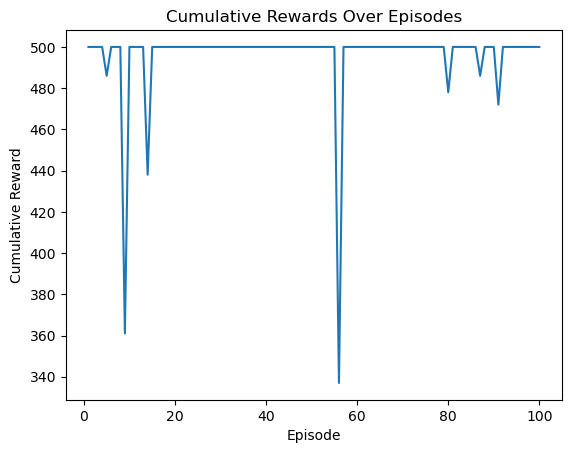

In [14]:
# Plot the cumulative rewards
plt.plot(range(1, episodes + 1), cumilative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Over Episodes')
plt.show()

In [15]:
mean = sum(cumilative_rewards) / len(cumilative_rewards)
print("Average cummulative reward: ", mean)

Average cummulative reward:  [495.58]


From the results in the cummulative graph, we could see that for every episode, the rewards are consistent with an average value of around <code> 490-500 </code>. This indicated that the RL agent has successfully learned the PPO to effectively balance the pole on the cart.

<h1> Task 3: Render an episode played by RL agent </h1>

In [16]:
from IPython.display import HTML
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

In [17]:
done = False
vec_env = DummyVecEnv([lambda: gym.make("CartPole-v1", render_mode="rgb_array")])
obs = vec_env.reset()

#Record the environment at the first step
vec_env = VecVideoRecorder(vec_env, "logs/videos/",
                       record_video_trigger=lambda x: x == 0, video_length=1000,
                       name_prefix=f"ppo-agent-CartPole-v1")

vec_env.reset()
for i in range(1000 + 1):
    action, _ = model.predict(obs)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render("human")

    if done: 
        break;
vec_env.close()

#Hack to close window
import cv2
cv2.destroyAllWindows()

Moviepy - Building video C:\Users\Shun Jie\Documents\Github\pole-cart-balancer-rl\logs\videos\ppo-agent-CartPole-v1-step-0-to-step-1000.mp4.
Moviepy - Writing video C:\Users\Shun Jie\Documents\Github\pole-cart-balancer-rl\logs\videos\ppo-agent-CartPole-v1-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\Shun Jie\Documents\Github\pole-cart-balancer-rl\logs\videos\ppo-agent-CartPole-v1-step-0-to-step-1000.mp4


In [18]:
HTML("""
    <video alt="test" controls>
        <source src="logs/videos/ppo-agent-CartPole-v1-step-0-to-step-1000.mp4" type="video/mp4">
    </video>
""")

<h1> Further Investigation on effectiveness of PPO</h1>

In [21]:
import numpy as np

avg_score_per_dif_timesteps = []
episodes = 100
vec_env = model.get_env()

for i in range(5000, 35000, 5000):
    print("Training model for", i, "timesteps started")
    model = PPO('MlpPolicy', env, verbose=1)
    model.learn(total_timesteps=i)
    print("Training model for", i, "timesteps completed")
    
    sum_episode_scores = []  # Reset sum_episode_scores for each timestep iteration
    for episode in range(1, episodes + 1):
        score = 0
        obs = vec_env.reset()  # Reset the environment before each episode

        while True:
            action, _ = model.predict(obs)
            obs, reward, done, info = vec_env.step(action)
            score += reward

            if done:
                break

        # Convert score to scalar value if it's a NumPy array
        if isinstance(score, np.ndarray):
            score = score.item()

        sum_episode_scores.append(score)

    # Calculate average score for the current timestep iteration
    if sum_episode_scores:
        avg = sum(sum_episode_scores) / len(sum_episode_scores)
    else:
        avg = 0

    print("Average score for", i, "timesteps is ", round(avg, 2))
    avg_score_per_dif_timesteps.append(round(avg, 2))

env.close()


Training model for 5000 timesteps started
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | 22.7     |
| time/              |          |
|    fps             | 531      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.4        |
|    ep_rew_mean          | 27.4        |
| time/                   |             |
|    fps                  | 366         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008624451 |
|    clip_fraction        | 0.117       |
|    clip_range     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 45.6        |
|    ep_rew_mean          | 45.6        |
| time/                   |             |
|    fps                  | 336         |
|    iterations           | 4           |
|    time_elapsed         | 24          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.008676079 |
|    clip_fraction        | 0.0982      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.632      |
|    explained_variance   | 0.242       |
|    learning_rate        | 0.0003      |
|    loss                 | 25.8        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 53.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 59    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 72.8        |
|    ep_rew_mean          | 72.8        |
| time/                   |             |
|    fps                  | 335         |
|    iterations           | 6           |
|    time_elapsed         | 36          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.008549545 |
|    clip_fraction        | 0.0892      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.584      |
|    explained_variance   | 0.495       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.5        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 58          |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 90.2

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 75.4        |
|    ep_rew_mean          | 75.4        |
| time/                   |             |
|    fps                  | 327         |
|    iterations           | 6           |
|    time_elapsed         | 37          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.008328697 |
|    clip_fraction        | 0.0514      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.599      |
|    explained_variance   | 0.352       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.45        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 59.1        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 90.5

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 36.6        |
|    ep_rew_mean          | 36.6        |
| time/                   |             |
|    fps                  | 354         |
|    iterations           | 3           |
|    time_elapsed         | 17          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010256015 |
|    clip_fraction        | 0.0758      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | 0.0805      |
|    learning_rate        | 0.0003      |
|    loss                 | 17.8        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 38.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 47.4  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 196          |
|    ep_rew_mean          | 196          |
| time/                   |              |
|    fps                  | 308          |
|    iterations           | 13           |
|    time_elapsed         | 86           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0049298494 |
|    clip_fraction        | 0.039        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.552       |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.24         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00508     |
|    value_loss           | 7.51         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

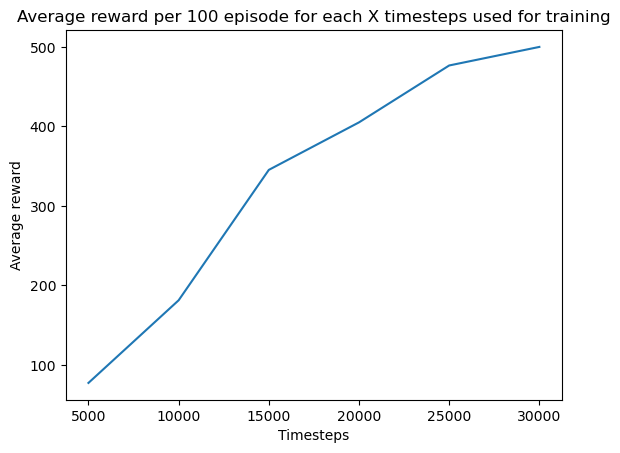

In [22]:
plt.plot(avg_score_per_dif_timesteps)
x_labels = ['5000', '10000', '15000', '20000', '25000', '30000']
plt.title("Average reward per 100 episode for each X timesteps used for training")
plt.ylabel("Average reward")
plt.xlabel("Timesteps")
plt.xticks(range(len(x_labels)), x_labels)
plt.show()

From the graph, it can be observed that PPO achieves relatively good reward scores of above 300, typically within the range of 15000 to 25000 steps, achieving  a near perfect performance.